In [1]:
import pandas as pd

df_it = pd.read_csv("results/pos_it_scores.csv")
df_law = pd.read_csv("results/pos_law_scores.csv")
df_med = pd.read_csv("results/pos_medical_scores.csv")

# Voeg domeinnaam toe
df_it["Domain"] = "IT"
df_law["Domain"] = "Law"
df_med["Domain"] = "Medical"

# Combineer alle
df_all = pd.concat([df_it, df_law, df_med], ignore_index=True)

In [2]:
# Pivot naar POS als index, domeinen als kolommen
df_pivot = df_all.pivot_table(index="POS", columns="Domain", values="F1")

# Sorteer op gemiddelde F1 over domeinen
df_pivot["mean"] = df_pivot.mean(axis=1)
df_pivot = df_pivot.sort_values(by="mean", ascending=False).drop(columns="mean")

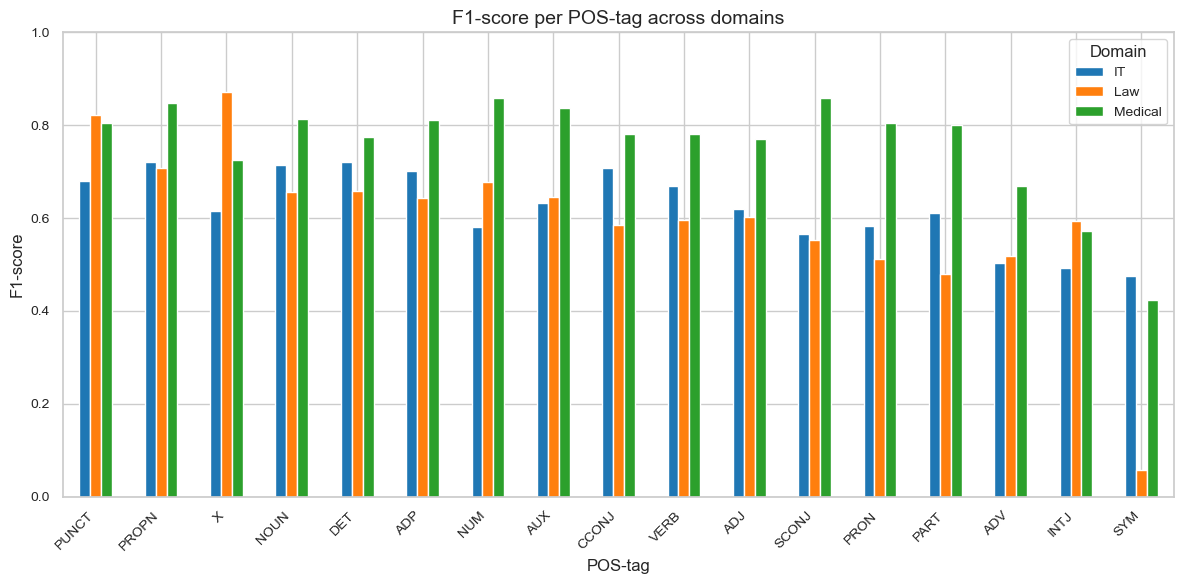

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Blauw (IT), Oranje (Law), Groen (Medical)

# Plot
ax = df_pivot.plot(kind="bar", figsize=(12, 6), color=colors)

plt.title("F1-score per POS-tag across domains", fontsize=14)
plt.ylabel("F1-score", fontsize=12)
plt.xlabel("POS-tag", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, 1)

plt.legend(title="Domain", title_fontsize=12, fontsize=10, loc="upper right")

plt.tight_layout()
plt.savefig("mt_pos_f1_per_domain.png", dpi=300, bbox_inches="tight")
plt.show()